In [1]:
import mne
import pandas as pd
import numpy as np
acc = pd.read_csv('ACC.csv')
acc = acc.iloc[1:]
acc.columns = ['column1','column2','column3']
np.savetxt('acc.txt',acc)



acc_c1 = acc["column1"]
acc_c2 = acc["column2"]
acc_c3 = acc["column3"]
acc_array_c1 = acc_c1.to_numpy() #save the data into an ndarray
acc_array_c2 = acc_c2.to_numpy()
acc_array_c3 = acc_c3.to_numpy()
acc_array_c1.shape

acc_array_c1 = acc_array_c1[0:66000]  # Remove the signal in first 3minutes and last 5minutes
acc_array_c2 = acc_array_c2[0:66000]
acc_array_c3 = acc_array_c3[0:66000]

sampling_freq = 1/32
N = acc_array_c1.size

xf = np.linspace(-N*sampling_freq/2, N*sampling_freq/2,  N)


index = np.linspace(0, round((N-1)*sampling_freq,4), N)

In [2]:
from scipy.fft import fft,fftshift
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

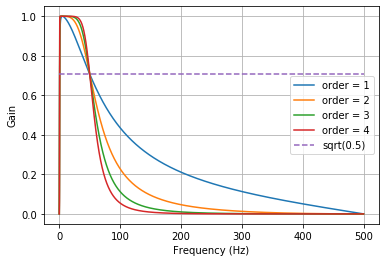

In [3]:
from scipy.signal import freqz
from scipy import signal
# Sample rate and desired cutoff frequencies (in Hz).
fs = 1000.0
lowcut = 0.5
highcut = 50.0

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
for order in [1, 2, 3, 4]:
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = freqz(b, a, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
         '--', label='sqrt(0.5)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

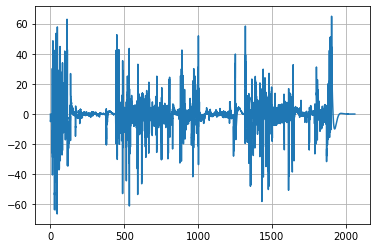

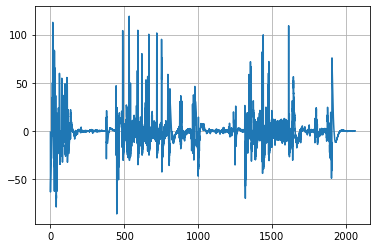

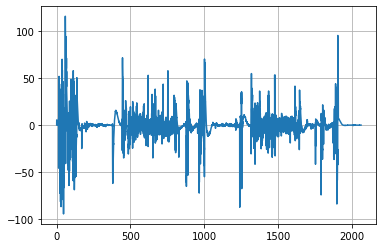

In [4]:
from scipy import signal
y1 = butter_bandpass_filter(acc_array_c1, lowcut, highcut, fs, order=2)
plt.plot(index, y1, label='Filtered signal (Hz)')
plt.grid(True)
plt.show()
y2 = butter_bandpass_filter(acc_array_c2, lowcut, highcut, fs, order=2)
plt.plot(index, y2, label='Filtered signal (Hz)')
plt.grid(True)
plt.show()
y3 = butter_bandpass_filter(acc_array_c3, lowcut, highcut, fs, order=2)
plt.plot(index, y3, label='Filtered signal (Hz)')
plt.grid(True)
plt.show()



In [5]:
y1.size

66000

In [6]:
from scipy import signal
#y = butter_bandpass_filter(ppg_array, lowcut, highcut, fs, order=2)
resampled_signal1 = y1
resampled_signal2 = y2
resampled_signal3 = y3

In [7]:
np.savetxt('processed_acc_col1.txt',resampled_signal1)
np.savetxt('processed_acc_col2.txt',resampled_signal2)
np.savetxt('processed_acc_col3.txt',resampled_signal3)

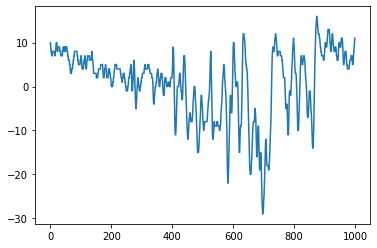

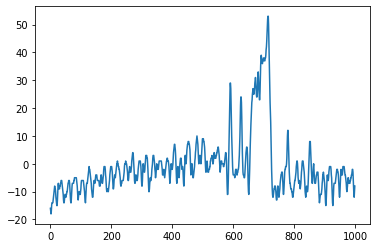

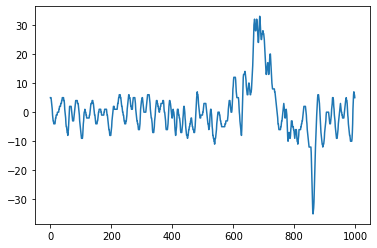

In [8]:
rounded_signal1 = np.around(resampled_signal1)
rounded_signal2 = np.around(resampled_signal2)
rounded_signal3 = np.around(resampled_signal3)
plt.plot(rounded_signal1[20000:21000])
plt.show()
plt.plot(rounded_signal2[20000:21000])
plt.show()
plt.plot(rounded_signal3[20000:21000])
plt.show()

In [9]:
from scipy.fftpack import fft, dct
aN1 = dct(rounded_signal1, type = 2, norm = 'ortho')
aN2 = dct(rounded_signal2, type = 2, norm = 'ortho')
aN3 = dct(rounded_signal3, type = 2, norm = 'ortho')


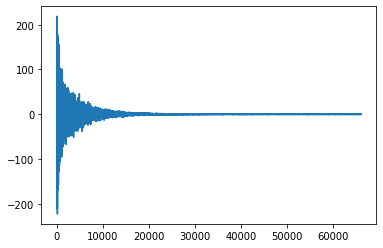

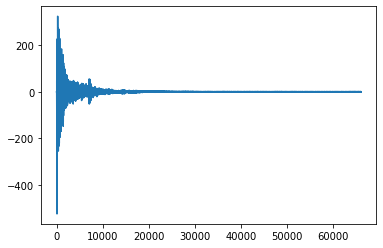

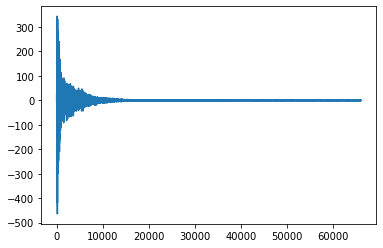

In [10]:
plt.plot(aN1)
plt.show()
plt.plot(aN2)
plt.show()
plt.plot(aN3)
plt.show()

In [11]:
def return_N(target):
    if target > 1:
        for i in range(1, int(target)):
            if (2 ** i >= target):
                return i-1
    else:
        return 1


In [12]:
from itertools import islice 
split_list = [1]
for i in range(0,return_N(aN1.size)):
    split_list.append(2 ** i)
temp1 = iter(aN1) 
res1 = [list(islice(temp1, 0, ele)) for ele in split_list]
temp2 = iter(aN2) 
res2 = [list(islice(temp2, 0, ele)) for ele in split_list]
temp3 = iter(aN3) 
res3 = [list(islice(temp3, 0, ele)) for ele in split_list]

In [13]:
from scipy.fftpack import fft, dct, idct
cN_idct1 = [list(idct(res1[0], type = 2, norm = 'ortho' )), list(idct(res1[1], type = 2, norm = 'ortho' ))]
for k in range(2,len(res1)):
    cN_idct1.append(list(idct(res1[k], type = 2, norm = 'ortho' )))
cN_idct2 = [list(idct(res2[0], type = 2, norm = 'ortho' )), list(idct(res2[1], type = 2, norm = 'ortho' ))]
for k in range(2,len(res2)):
    cN_idct2.append(list(idct(res2[k], type = 2, norm = 'ortho' )))
cN_idct3 = [list(idct(res3[0], type = 2, norm = 'ortho' )), list(idct(res3[1], type = 2, norm = 'ortho' ))]
for k in range(2,len(res3)):
    cN_idct3.append(list(idct(res3[k], type = 2, norm = 'ortho' )))

In [14]:
all_numbers1 = []
for i in cN_idct1:
    for j in i:
        all_numbers1.append(j)
all_numbers2 = []
for i in cN_idct2:
    for j in i:
        all_numbers2.append(j)
all_numbers3 = []
for i in cN_idct3:
    for j in i:
        all_numbers3.append(j)

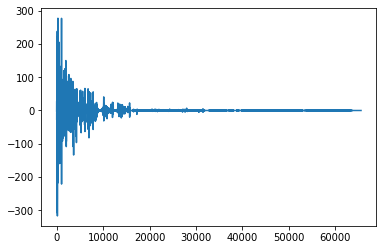

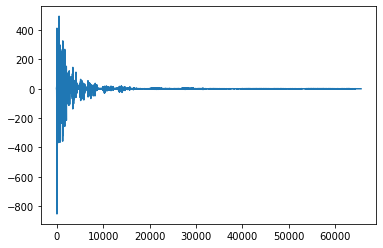

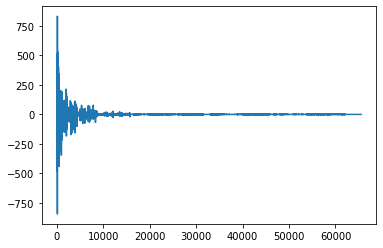

In [15]:
plt.plot(all_numbers1)
plt.show()
plt.plot(all_numbers2)
plt.show()
plt.plot(all_numbers3)
plt.show()

In [16]:
all_numbers1 = np.asarray(all_numbers1)
all_numbers2 = np.asarray(all_numbers2)
all_numbers3 = np.asarray(all_numbers3)

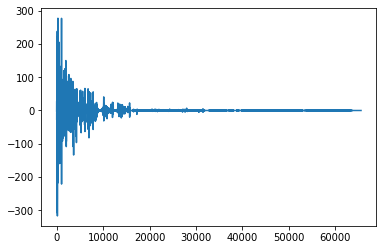

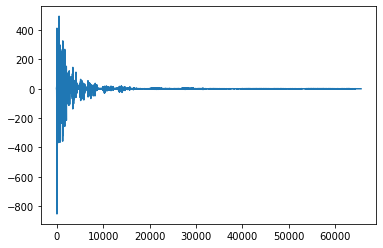

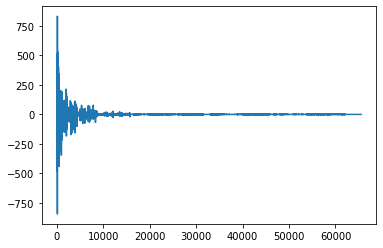

In [17]:
plt.plot(all_numbers1)
plt.show()
plt.plot(all_numbers2)
plt.show()
plt.plot(all_numbers3)
plt.show()

In [18]:
int_cN1 = np.round(all_numbers1)
int_cN2 = np.round(all_numbers1)
int_cN3 = np.round(all_numbers1)

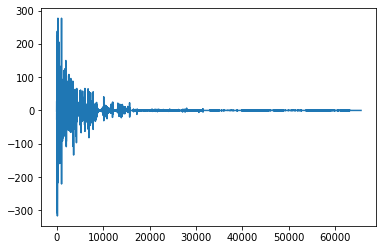

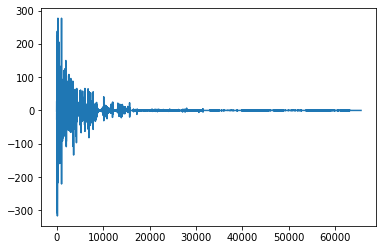

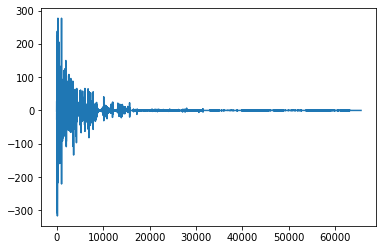

In [19]:
plt.plot(int_cN1)
plt.show()
plt.plot(int_cN2)
plt.show()
plt.plot(int_cN3)
plt.show()

In [20]:
def RLE(input_data):
    RLE_VALUE = []
    RLE_FREQ = []
    count = 0
    for i in range(0,len(input_data)):
        if i == len(input_data)-1:
            if input_data[i] != input_data[i-1]:
                RLE_VALUE.append(input_data[i])
                RLE_FREQ.append(1)
                return RLE_VALUE, RLE_FREQ
            else:
                return RLE_VALUE, RLE_FREQ
        else:
            if input_data[i] == input_data[i+1]:
                RLE_VALUE.append(input_data[i])
                count += 1
            else:
                RLE_VALUE.append(input_data[i])
                count += 1
                RLE_FREQ.append(count)
                count = 0


In [21]:
value1, freq1 = RLE(int_cN1)
value2, freq2 = RLE(int_cN2)
value3, freq3 = RLE(int_cN3)

In [22]:
np.savetxt('acc1_value_rle.txt',value1, fmt='%.3f')
np.savetxt('acc1_freq_rle.txt',freq1, fmt='%.3f')
np.savetxt('acc2_value_rle.txt',value2, fmt='%.3f')
np.savetxt('acc2_freq_rle.txt',freq2, fmt='%.3f')
np.savetxt('acc3_value_rle.txt',value3, fmt='%.3f')
np.savetxt('acc3_freq_rle.txt',freq3, fmt='%.3f')

In [23]:
np.savetxt('int_cN1.txt',int_cN1, fmt='%.3f')
np.savetxt('int_cN2.txt',int_cN2, fmt='%.3f')
np.savetxt('int_cN3.txt',int_cN3,fmt='%.3f')

### Evaluation 

#### DCT and with RLE coding

The results of this method on the following wearable sensors:

| Wearable Sensor | Compression Ratio | Percentage RMS difference |
| ------ | ------ | ------ | 
| ECG | 3.11 | 8.974% |
| PPG | 1.08 | almost 0 |
| ACC | 1 | 124.403% |
| EDA |  | % |
| TEMP |  | % |

#### DCT and with Huffman coding

The results of this method on the following wearable sensors:

| Wearable Sensor | Compression Ratio | Percentage RMS difference |
| ------ | ------ | ------ | 
| ECG | 33.32 | 8.974% |
| PPG | 9.00 | almost 0 |
| ACC | 6.07 | 124.403% |
| EDA |  | % |
| TEMP |  | % |

In [24]:
recover_signal1 = int_cN1 
recover_signal2 = int_cN2
recover_signal3 = int_cN3
recover_signal1 = list(recover_signal1)
recover_signal2 = list(recover_signal2)
recover_signal3 = list(recover_signal3)
len(recover_signal1)

65536

In [25]:
split_list = [1]
for i in range(0,return_N(len(recover_signal1))+1):
    split_list.append(2 ** i)
temp_recovered1 = iter(recover_signal1) 
res_recovered1 = [list(islice(temp_recovered1, 0, ele)) for ele in split_list]
temp_recovered2 = iter(recover_signal2) 
res_recovered2 = [list(islice(temp_recovered2, 0, ele)) for ele in split_list] 
temp_recovered3 = iter(recover_signal3) 
res_recovered3 = [list(islice(temp_recovered3, 0, ele)) for ele in split_list] 

In [26]:
recover_dct1 = [list(dct(res_recovered1[0], type = 2, norm = 'ortho' )), list(dct(res_recovered1[1], type = 2, norm = 'ortho' ))]
for k in range(2,len(res_recovered1)):
    recover_dct1.append(list(dct(res_recovered1[k], type = 2, norm = 'ortho' )))
recover_dct2 = [list(dct(res_recovered2[0], type = 2, norm = 'ortho' )), list(dct(res_recovered2[1], type = 2, norm = 'ortho' ))]
for k in range(2,len(res_recovered2)):
    recover_dct2.append(list(dct(res_recovered2[k], type = 2, norm = 'ortho' )))
recover_dct3 = [list(dct(res_recovered3[0], type = 2, norm = 'ortho' )), list(dct(res_recovered3[1], type = 2, norm = 'ortho' ))]
for k in range(2,len(res_recovered3)):
    recover_dct3.append(list(dct(res_recovered3[k], type = 2, norm = 'ortho' )))

In [27]:
all_recover1 = []
for i in recover_dct1:
    for j in i:
        all_recover1.append(j)
all_recover2 = []
for i in recover_dct2:
    for j in i:
        all_recover2.append(j)
all_recover3 = []
for i in recover_dct3:
    for j in i:
        all_recover3.append(j)


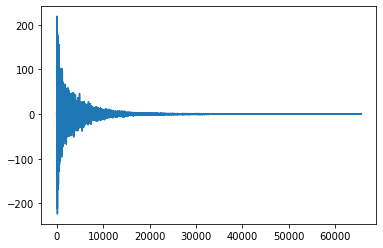

In [28]:
plt.plot(all_recover1)

In [29]:
aN_recover1 = idct(all_recover1, type = 2, norm = 'ortho')
aN_recover2 = idct(all_recover2, type = 2, norm = 'ortho')
aN_recover3 = idct(all_recover3, type = 2, norm = 'ortho')

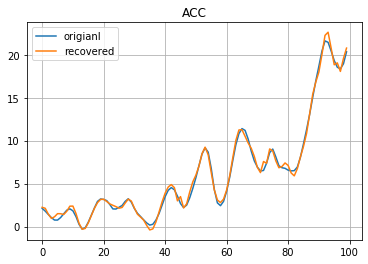

In [30]:
plt.plot(signal.resample(y1, len(aN_recover1))[31000:31100], label = "origianl")
plt.plot(aN_recover1[31000:31100], label = "recovered")
plt.legend()
plt.title('ACC')
plt.grid()
plt.show()

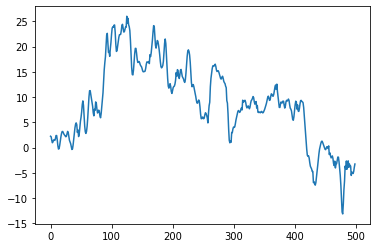

In [31]:
plt.plot(aN_recover1[31000:31500])
plt.show()

In [32]:
aN_recover1.size

65536

In [33]:
#resampled_signal_shorter = resampled_signal1[:len(aN_recover1)] 
resampled_signal_shorter1 = signal.resample(y1, len(aN_recover1))
from sklearn.metrics import mean_squared_error
from math import sqrt

def PRD_calculation(original_signal, compressed_signal):
    PRD = sqrt(sum((original_signal-compressed_signal)**2)/(sum(original_signal**2)))
    return PRD

PRD = PRD_calculation(resampled_signal_shorter1, aN_recover1)
print("The PRD is {}%".format(round(PRD*100,3)))

The PRD is 3.661%


In [34]:
y.size

NameError: name 'y' is not defined